In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import collections
import time
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import scipy as sp
from run_dist_mat import *
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [2]:
X = np.random.multivariate_normal([0,0], [[3,0],[0,4]], (15))
Y = np.random.multivariate_normal([-5,0], [[6,0],[0,0.1]], (5))
X = np.vstack([X,Y])

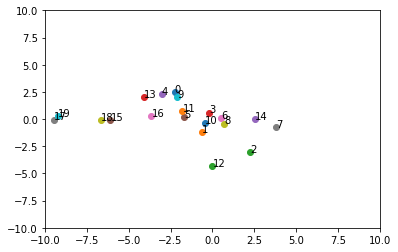

In [3]:
plt.figure()
plt.xlim((-10,10))
plt.ylim((-10,10))
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1])
    plt.text(X[i,0], X[i,1], str(i))

Text(5, 0, '2')
Text(15, 0, '12')


KeyError: '12'

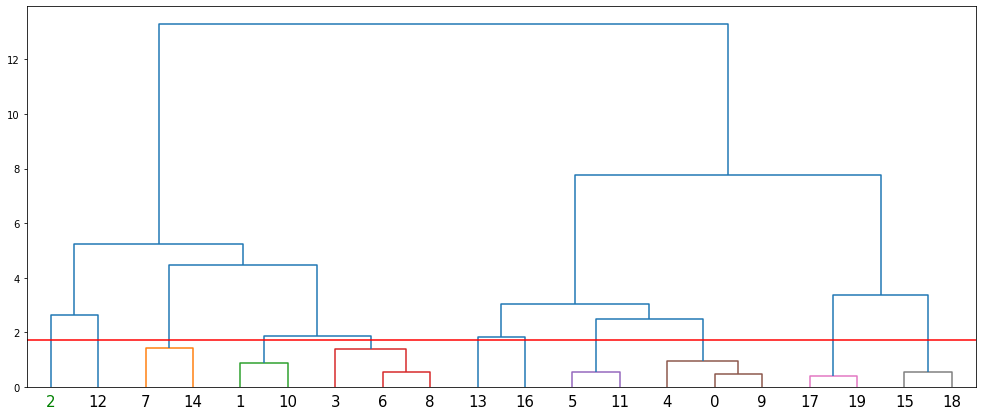

In [12]:
linked = linkage(X, 'complete')
t = 1.7
plt.figure(figsize=(17, 7))
dend = dendrogram(linked,
            orientation='top',
#            truncate_mode='level',  # show only the last p merged clusters
#             p=3,  # show only the last p merged clusters
            distance_sort='ascending',
               color_threshold = t,
               get_leaves = True,
           leaf_font_size = 15,
           leaf_rotation = 0,
            show_leaf_counts=True)
plt.axhline(t, c = 'red')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'1': 'r', '2': 'g', '3': 'b', '4': 'm'}

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    print(lbl)
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()
# plt.show()

Text(0, 0, '')


KeyError: ''

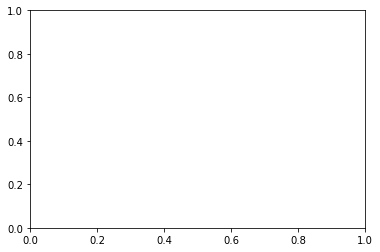

Text(0.5, 0.95, 'criterion: max cluster')

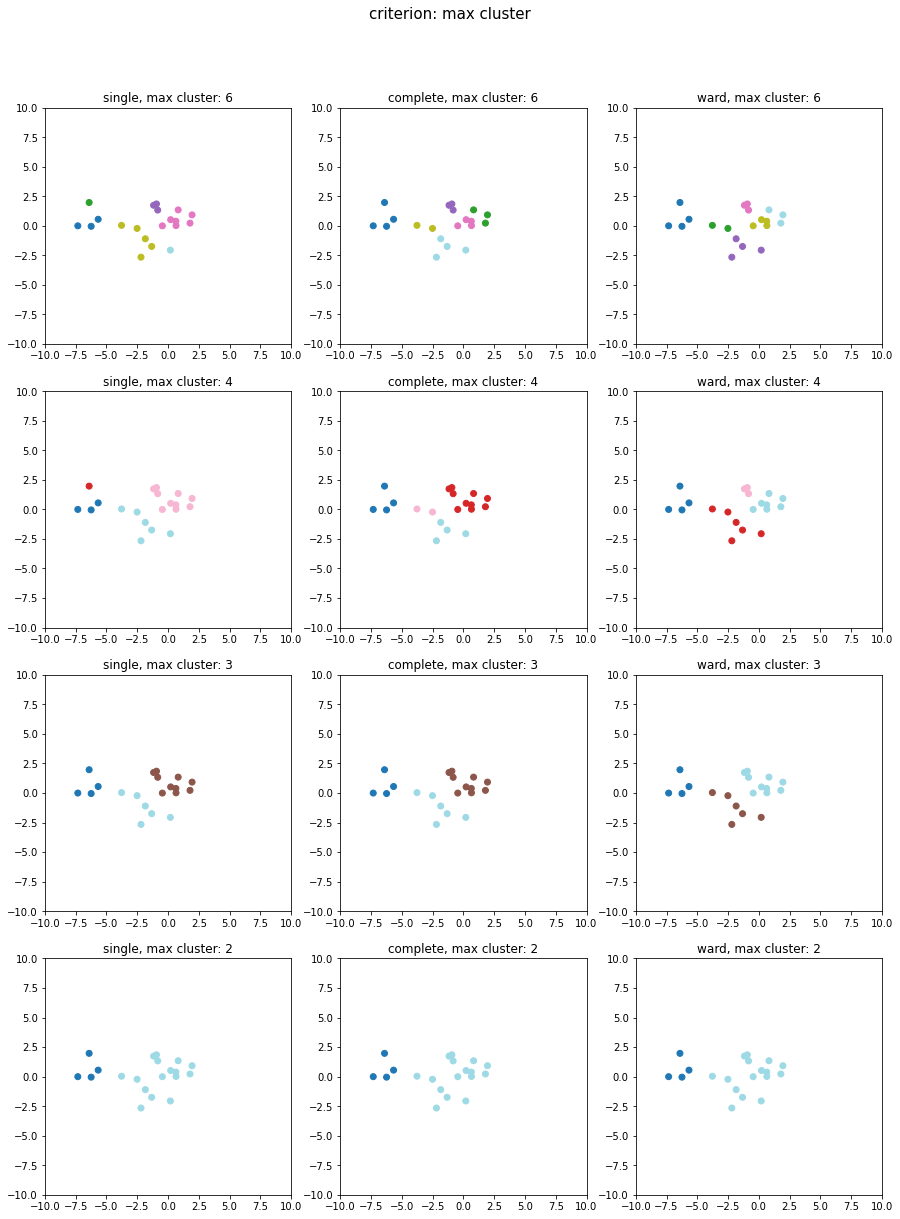

In [154]:
fig, axes = plt.subplots(4,3, figsize = (15,20))

for i, t in enumerate([6,4,3,2]):
    for j, link in enumerate(["single", 'complete', 'ward']):
        linked = linkage(X, link)
        c = fcluster(linked, t = t,criterion='maxclust')
        axes[i,j].scatter(X[:,0], X[:,1], c = c, cmap = 'tab20')
        axes[i,j].set_xlim((-10,10))
        axes[i,j].set_ylim((-10,10))
        axes[i,j].set_title(link + ", max cluster: "+ str(t))
plt.suptitle("criterion: max cluster", y = 0.95, fontsize = 15)


Text(0.5, 0.95, 'criterion: distance')

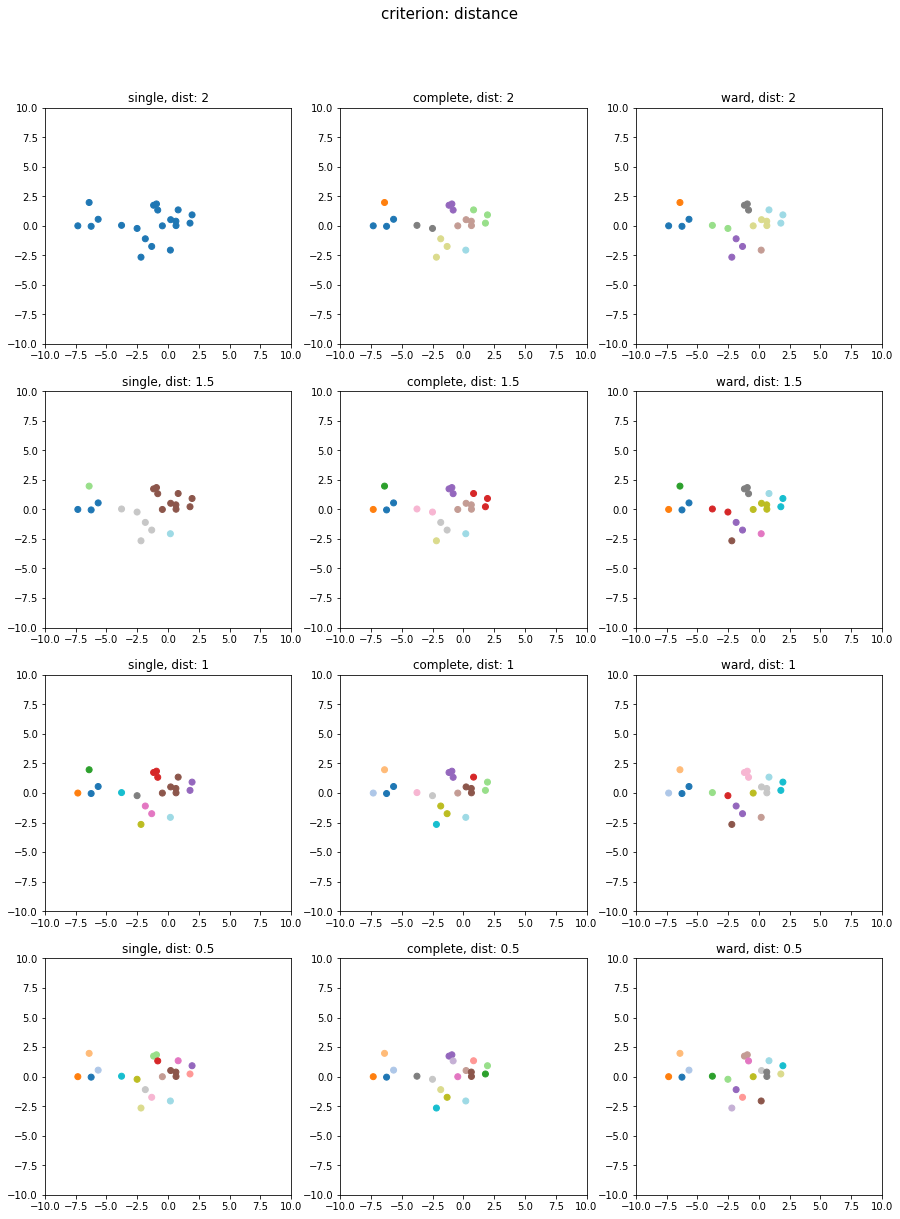

In [157]:
fig, axes = plt.subplots(4,3, figsize = (15,20))

for i, t in enumerate([2, 1.5, 1, 0.5]):
    for j, link in enumerate(["single", 'complete', 'ward']):
        linked = linkage(X, link)
        c = fcluster(linked, t = t,criterion='distance')
        axes[i,j].scatter(X[:,0], X[:,1], c = c, cmap = 'tab20')
        axes[i,j].set_xlim((-10,10))
        axes[i,j].set_ylim((-10,10))
        axes[i,j].set_title(link + ", dist: "+ str(t))
plt.suptitle("criterion: distance", y = 0.95, fontsize = 15)

If you want to infer the truncation value t from the clustering image: t must be larger than the largest intra-cluster distance, and smaller than the smallest inter-cluster distance